In [75]:
import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline 
from collections import Counter
import numpy as np

In [4]:
f = '../../data/sherlock_current_wtext.csv'

In [31]:
df = pd.read_csv(f)

In [32]:
df.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
       'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
       'PublishDate', 'Rating', 'Relationship', 'Summary', 'Text', 'Title',
       'UpdateDate', 'Words'], dtype=object)

In [33]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [34]:
len(df)

198632

In [39]:
df = df[(df.ChapterIndex.isnull()) | (df.ChapterIndex == 1)]

In [41]:
len(df)

72331

In [42]:
df.head(1)

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Language,Notes,PublishDate,Rating,Relationship,Summary,Text,Title,UpdateDate,Words
0,"Implied/Referenced Rape/Non-con, Past Rape/No...",Creator Chose Not To Use Archive Warnings,HunterusHeroicus,{'2016-03': 1},Gen,NaN,1/1,"John Watson, Sherlock Holmes, Mycroft Holmes,...",{'2016-01': 2},2015-01-11,...,English,NaN,2015-01-11,Mature,NaN,"Mycroft pays a visit, and John gets some answers.","\nWhen John got back to the flat, his head was...",In Memoriam,NaN,1016


In [76]:
df.to_csv('../../data/sherlock_current_wtext_firstch.csv', index = False)

In [50]:
timelist = df.PublishDate.drop_duplicates().tolist()
timelist = [str(i)[:7] for i in timelist]
timelist = list(set(timelist))
timelist = sorted(timelist)[1:]

In [52]:
time_work = {}
for i in timelist:
    df_time = create_df_time(df, i)
    time_work[i] = len(df_time)

In [53]:
sum(time_work.values())

72329

In [54]:
k = sorted(time_work.keys())
v = [time_work.get(i) for i in k]
print k[0], v[0]

2010-08 172


In [55]:
timelist3 = ['Season 1 start', 'Season 1 end', '', '', 'Season 1 DVD release', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', 'Season 2', '', '', '', 'Season 2 DVD release', '', '', '', '', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', '', 'Christmas special', '', 'Season 3', 'Season 3 DVD release', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', '', '', '', '', '', '', '']

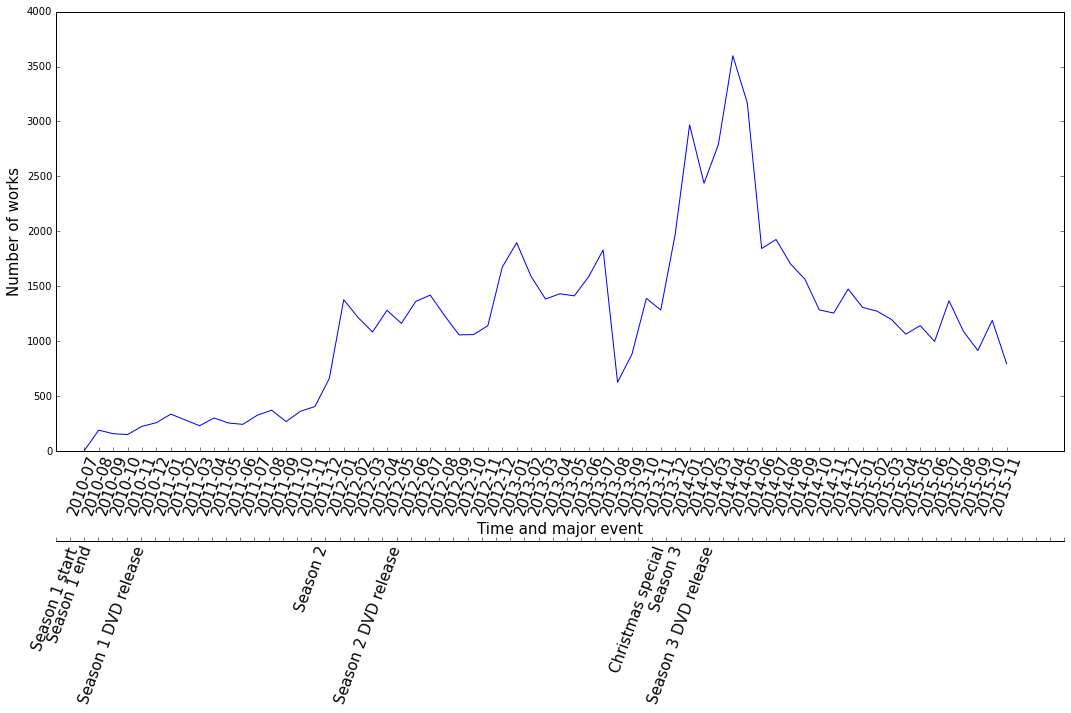

In [24]:
fig, ax = plt.subplots(figsize = (15,10))
newax = ax.twiny()

# Make some room at the bottom
fig.subplots_adjust(bottom=0.30)

newax.set_frame_on(True)
newax.patch.set_visible(False)
newax.xaxis.set_ticks_position('bottom')
newax.xaxis.set_label_position('bottom')
newax.spines['bottom'].set_position(('outward', 90))

xlist = range(2,67)
xlist2 = range(0,72)

ax.plot(xlist,v)
ax.xaxis.set_ticks(xlist)
ax.set_xticklabels(k, rotation=70, fontsize = 15)

newax.xaxis.set_ticks(xlist2)
newax.set_xticklabels(timelist3, rotation=70, fontsize = 15)

ax.set_xlabel('Time and major event', fontsize = 15)
ax.set_ylabel('Number of works', fontsize = 15)
plt.tight_layout()
plt.savefig('./time_work.pdf', format = 'pdf')

In [57]:
word = df.Words.fillna(False).tolist()
print max(word), min(word), np.average(word)

933636.0 0.0 5649.01390828


In [58]:
kudos = df.Kudos.fillna(False)
print max(kudos), min(kudos), np.average(kudos)

13037.0 0.0 104.358781159


In [59]:
hits = df.Hits.fillna(False)
print max(hits), min(hits), np.average(hits)

532014.0 0.0 2550.77987308


In [61]:
# comments = df.Comments.fillna(False)
# print max(comments), min(comments), np.average(comments)

In [62]:
warnings = ['Creator Chose Not To Use Archive Warnings', 'No Archive Warnings Apply',\
'Rape/Non-Con', 'Graphic Depictions Of Violence','Major Character Death','Underage']

In [64]:
df_warnings = df.ArchiveWarnings.fillna('Missing')
warnings_list = []
w = df_warnings.tolist()
for i in w:
    for j in i.split(','):
        if j.strip() in warnings:
            warnings_list.append(j)

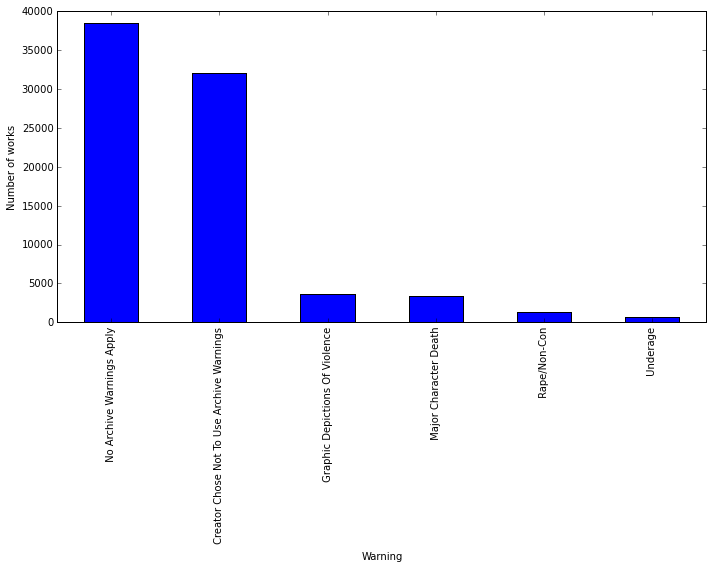

In [103]:
df_warnings = pd.DataFrame(warnings_list)
fig, ax = plt.subplots(figsize = (10,8))
df_warnings[0].value_counts().plot(ax=ax, kind='bar')
# ax.set_xticklabels(rotation = 70)
ax.set_xlabel('Warning')
ax.set_ylabel('Number of works')
plt.tight_layout()
plt.savefig('./work_warnings.pdf', format = 'pdf')

In [65]:
df.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
       'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
       'PublishDate', 'Rating', 'Relationship', 'Summary', 'Text', 'Title',
       'UpdateDate', 'Words'], dtype=object)

In [66]:
df_category = df.Category.fillna('Missing')

In [67]:
df_category = pd.DataFrame([i for i in df_category.tolist() if i != 'Missing'])

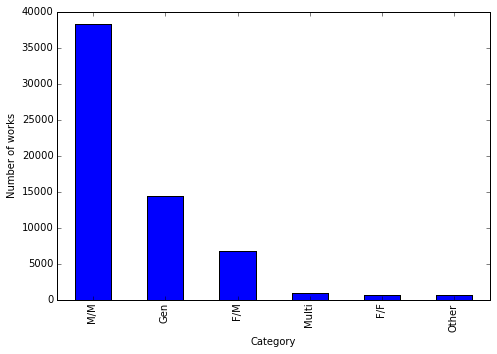

In [114]:
fig, ax = plt.subplots(figsize = (7,5))
df_category[0].value_counts().plot(ax=ax, kind='bar')
# ax.set_xticklabels(rotation = 70)
ax.set_xlabel('Category')
ax.set_ylabel('Number of works')
plt.tight_layout()
plt.savefig('./work_categories.pdf', format = 'pdf')

In [68]:
df_rating = df.Rating.fillna('Missing')

In [69]:
df_rating = pd.DataFrame([i for i in df_rating.tolist() if len(str(i)) < 20 and i != 'Missing'])

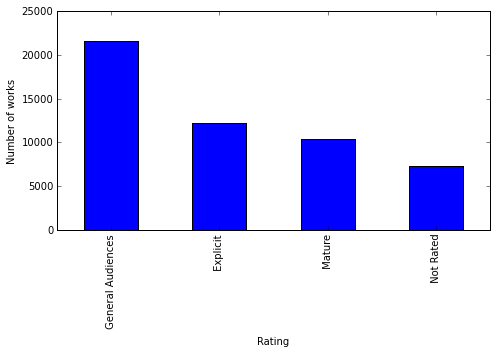

In [113]:
fig, ax = plt.subplots(figsize = (7,5))
df_rating[0].value_counts().plot(ax=ax, kind='bar')
# ax.set_xticklabels(rotation = 70)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of works')
plt.tight_layout()
plt.savefig('./work_rating.pdf', format = 'pdf')

In [70]:
df_relationship = df.Relationship.fillna('Missing')

In [71]:
df_relationship.drop_duplicates().tolist()
relationship_list = []
r = df_relationship.tolist()
for i in r:
    for j in i.split(','):
        relationship_list.append(j)

In [72]:
r_freq = {i:relationship_list.count(i) for i in set(relationship_list)}

In [73]:
df_relationship = pd.DataFrame(r_freq.keys(), r_freq.values()).reset_index()
df_relationship = df_relationship.sort('index', ascending = False)

/home/yizhi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [74]:
r = [i for i in df_relationship[0].tolist() if i != 'Missing'][0:10]
c = [i for i in df_relationship['index'].tolist() if i != 'Missing'][0:10]

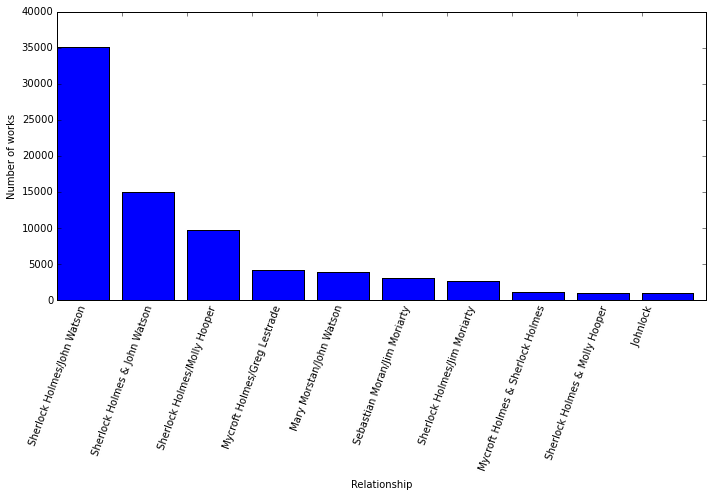

In [178]:
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(range(0,10),c)
ax.xaxis.set_ticks(range(0,10))
ax.set_xticklabels(r, rotation = 70)
ax.set_xlabel('Relationship')
ax.set_ylabel('Number of works')
plt.tight_layout()
plt.savefig('./work_relationship.pdf', format = 'pdf')

In [182]:
tags = df.Additional_Tags.tolist()

In [189]:
tags[0]

' 5 Things, Prompt Fic, Community: sherlockbbc_fic'

In [ ]:
tags_l = x

In [180]:
tags_s = []
for i in tags:
    tags_s1 = []
    j = str(i).split(',')
    for k in j:
        if 'Sherlock' in k:
            tags_s1.append(k)
    tags_s.append(tags_s1)
# with open ('/Users/jingy/Desktop/sherlock_tags_all2','a') as g:
#     for i in tags_s:
#         g.write(i)
#         g.write('\n')

In [184]:
tags_s = []
for i in tags:
    j = str(i).split(',')
    for k in j:
        if 'Sherlock' in k:
            tags_s.append(k)
tags_s = [i for i in tags_s if i != []]

In [185]:
counts = Counter(tags_s)
new_list = sorted(tags_s, key=counts.get, reverse=True)

In [186]:
tag_freq = {i:tags_s.count(i) for i in set(tags_s)}

In [187]:
import operator
sorted_tag_freq = sorted(tag_freq.items(), key=operator.itemgetter(1), reverse = True)

In [188]:
sorted_tag_freq[0:50]

[(' POV Sherlock Holmes', 659),
 (' Sherlock Being Sherlock', 635),
 (' BBC Sherlock - Freeform', 584),
 (' Virgin Sherlock', 471),
 (' Sherlock - Freeform', 441),
 (' Sherlock Holmes and Feelings', 404),
 (' Pining Sherlock', 381),
 (' Established Sherlock Holmes/John Watson', 310),
 (' Asexual Sherlock', 301),
 (' Kid Sherlock', 275),
 (' Alpha Sherlock', 267),
 (' Possessive Sherlock', 255),
 (' Sherlock Is A Bit Not Good', 244),
 (' Omega Sherlock', 225),
 (' Sherlock Holmes - Freeform', 221),
 (' Sherlock Loves John', 219),
 (' Jealous Sherlock', 214),
 (' Top Sherlock', 208),
 (' Bottom Sherlock Holmes', 208),
 (' Sherlock Series 3 Spoilers', 191),
 (" Sherlock's Violin", 187),
 (' Sherlock AU', 164),
 (' Asexual!Sherlock', 162),
 (' John Loves Sherlock', 154),
 (' Sherlock Holmes & John Watson Friendship', 143),
 (' Sherlock-centric', 143),
 (' Sherlock is a Brat', 138),
 (' Dark Sherlock', 126),
 (' Sherlock Being an Idiot', 124),
 (' Vampire Sherlock', 123),
 (' Bottom Sherloc

In [3]:
import random


0

In [17]:
random.choice(range(0, 200))

101